<a href="https://colab.research.google.com/github/Fatehbs/AI-applications/blob/main/FDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
EPS = np.finfo(np.float64).eps

In [ ]:
func = lambda x : x**3

In [ ]:
EPS

2.220446049250313e-16

In [ ]:
data_df = pd.DataFrame({
    'x': np.linspace(start = -5, stop = 5, num = 100 + 1, endpoint = True, dtype = np.float64)
}, dtype = np.float64)

In [ ]:
data_df['y'] = data_df['x'].apply(func)

# First Order Derivatives

In [ ]:
h = EPS ** (1.0/2.0)

In [ ]:
h

1.4901161193847656e-08

In [ ]:
first_order_df = data_df[['x']].copy()

In [ ]:
first_order_df

,x
0,-5.0
1,-4.9
2,-4.8
3,-4.7
4,-4.6
...,...
96,4.6
97,4.7
98,4.8
99,4.9


In [ ]:
first_order_df.eval('x_p1 = x + 0.5 * @h', inplace = True)
first_order_df.eval('x_m1 = x - 0.5 * @h', inplace = True)

In [ ]:
first_order_df

,x,x_p1,x_m1
0,-5.0,-5.0,-5.0
1,-4.9,-4.9,-4.9
2,-4.8,-4.8,-4.8
3,-4.7,-4.7,-4.7
4,-4.6,-4.6,-4.6
...,...,...,...
96,4.6,4.6,4.6
97,4.7,4.7,4.7
98,4.8,4.8,4.8
99,4.9,4.9,4.9


In [ ]:
output_df = first_order_df.apply(func)

In [ ]:
output_df.eval('dy_dx = (x_p1 - x_m1)/(@h)', inplace = True)

In [ ]:
output_df[['dy_dx']]

,dy_dx
0,75.00
1,72.03
2,69.12
3,66.27
4,63.48
...,...
96,63.48
97,66.27
98,69.12
99,72.03


In [ ]:
data_df = (
    data_df.join(output_df[['dy_dx']])
)

In [ ]:
data_df

,x,y,dy_dx
0,-5.0,-125.000,75.00
1,-4.9,-117.649,72.03
2,-4.8,-110.592,69.12
3,-4.7,-103.823,66.27
4,-4.6,-97.336,63.48
...,...,...,...
96,4.6,97.336,63.48
97,4.7,103.823,66.27
98,4.8,110.592,69.12
99,4.9,117.649,72.03


# Second Order

In [ ]:
h = EPS ** (1/3)

In [ ]:
h

6.055454452393343e-06

In [ ]:
output_df = pd.DataFrame({
    'y': data_df['x']
}, dtype = np.float64)

In [ ]:
output_df.eval('y_p1 = y + @h', inplace = True)
output_df.eval('y_m1 = y - @h', inplace = True)

In [ ]:
output_df

,y,y_p1,y_m1
0,-5.0,-4.999994,-5.000006
1,-4.9,-4.899994,-4.900006
2,-4.8,-4.799994,-4.800006
3,-4.7,-4.699994,-4.700006
4,-4.6,-4.599994,-4.600006
...,...,...,...
96,4.6,4.600006,4.599994
97,4.7,4.700006,4.699994
98,4.8,4.800006,4.799994
99,4.9,4.900006,4.899994


In [ ]:
 output_df = output_df.apply(func)

In [ ]:
output_df

,y,y_p1,y_m1
0,-125.000,-124.999546,-125.000454
1,-117.649,-117.648564,-117.649436
2,-110.592,-110.591581,-110.592419
3,-103.823,-103.822599,-103.823401
4,-97.336,-97.335616,-97.336384
...,...,...,...
96,97.336,97.336384,97.335616
97,103.823,103.823401,103.822599
98,110.592,110.592419,110.591581
99,117.649,117.649436,117.648564


In [ ]:
output_df.eval('d2y_dx2 = (y_p1 - 2 * y + y_m1)/(@h ** 2)', inplace = True)

In [ ]:
output_df[['d2y_dx2']]

,d2y_dx2
0,-30.000175
1,-29.399861
2,-28.800323
3,-28.200009
4,-27.599696
...,...
96,27.600471
97,28.200397
98,28.799548
99,29.399861


In [ ]:
data_df = data_df.join(output_df[['d2y_dx2']])

In [ ]:
data_df

,x,y,dy_dx,d2y_dx2
0,-5.0,-125.000,75.00,-30.000175
1,-4.9,-117.649,72.03,-29.399861
2,-4.8,-110.592,69.12,-28.800323
3,-4.7,-103.823,66.27,-28.200009
4,-4.6,-97.336,63.48,-27.599696
...,...,...,...,...
96,4.6,97.336,63.48,27.600471
97,4.7,103.823,66.27,28.200397
98,4.8,110.592,69.12,28.799548
99,4.9,117.649,72.03,29.399861


# Third Order Derivatives

In [ ]:
h = EPS ** (1/4)

In [ ]:
output_df = pd.DataFrame({
    'y': data_df['x']
}, dtype = np.float64)

In [ ]:
output_df

,y
0,-5.0
1,-4.9
2,-4.8
3,-4.7
4,-4.6
...,...
96,4.6
97,4.7
98,4.8
99,4.9


In [ ]:
output_df.eval('y_p2 = y + 1.5 * @h', inplace = True)
output_df.eval('y_p1 = y + 0.5 * @h', inplace = True)
output_df.eval('y_m1 = y - 0.5 * @h', inplace = True)
output_df.eval('y_m2 = y - 1.5 * @h', inplace = True)

In [ ]:
output_df

,y,y_p2,y_p1,y_m1,y_m2
0,-5.0,-4.999817,-4.999939,-5.000061,-5.000183
1,-4.9,-4.899817,-4.899939,-4.900061,-4.900183
2,-4.8,-4.799817,-4.799939,-4.800061,-4.800183
3,-4.7,-4.699817,-4.699939,-4.700061,-4.700183
4,-4.6,-4.599817,-4.599939,-4.600061,-4.600183
...,...,...,...,...,...
96,4.6,4.600183,4.600061,4.599939,4.599817
97,4.7,4.700183,4.700061,4.699939,4.699817
98,4.8,4.800183,4.800061,4.799939,4.799817
99,4.9,4.900183,4.900061,4.899939,4.899817


In [ ]:
output_df = output_df.apply(func)

In [ ]:
output_df

,y,y_p2,y_p1,y_m1,y_m2
0,-125.000,-124.986268,-124.995422,-125.004578,-125.013733
1,-117.649,-117.635811,-117.644604,-117.653396,-117.662190
2,-110.592,-110.579344,-110.587781,-110.596219,-110.604657
3,-103.823,-103.810866,-103.818955,-103.827045,-103.835135
4,-97.336,-97.324377,-97.332126,-97.339875,-97.347624
...,...,...,...,...,...
96,97.336,97.347624,97.339875,97.332126,97.324377
97,103.823,103.835135,103.827045,103.818955,103.810866
98,110.592,110.604657,110.596219,110.587781,110.579344
99,117.649,117.662190,117.653396,117.644604,117.635811


In [ ]:
output_df.eval('d3y_dx3 = (y_p2 - 3 * y_p1 + 3 * y_m1 - y_m2)/(@h ** 3)', inplace = True)

In [ ]:
data_df = data_df.join(output_df[['d3y_dx3']])

In [ ]:
data_df

,x,y,dy_dx,d2y_dx2,d3y_dx3
0,-5.0,-125.000,75.00,-30.000175,6.000000
1,-4.9,-117.649,72.03,-29.399861,6.015625
2,-4.8,-110.592,69.12,-28.800323,5.976562
3,-4.7,-103.823,66.27,-28.200009,6.000000
4,-4.6,-97.336,63.48,-27.599696,6.007812
...,...,...,...,...,...
96,4.6,97.336,63.48,27.600471,6.000000
97,4.7,103.823,66.27,28.200397,6.000000
98,4.8,110.592,69.12,28.799548,5.984375
99,4.9,117.649,72.03,29.399861,6.015625


# Plots

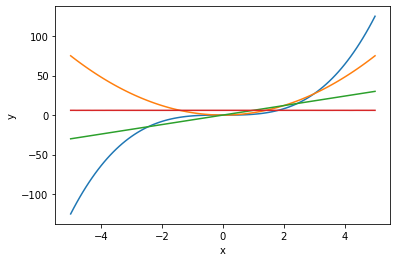

In [ ]:
sns.lineplot(x = 'x', y = 'y', data = data_df)
sns.lineplot(x = 'x', y = 'dy_dx', data = data_df)
sns.lineplot(x = 'x', y = 'd2y_dx2', data = data_df)
sns.lineplot(x = 'x', y = 'd3y_dx3', data = data_df)